In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/Yash-Pandey007/Phishing_ML/refs/heads/main/dataset_phishing.csv')

In [3]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,3,0,0,0,0,0,0,4,4,3,3,3,11,11,6,5.750000,7.0,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0,0,0.875000,0,0.500000,0,0,80.000000,0,100.000000,0.000000,0,0,0,0.0,0,0,0,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.0,0,0,0,0,0,1,0,0,0,0,1,0,4,4,2,19,2,32,19,32,15.750000,19.0,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.0,0,0,0,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.0,0,0,0,1,0,3,1,0,0,0,1,0,12,2,2,3,2,17,13,17,8.250000,8.4,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.0,0,0,0,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,1,0,5,5,0,5,5,0,5.000000,5.0,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0,0,0.250000,0,0.250000,0,0,100.000000,0,96.428571,3.571429,0,0,0,62.5,0,0,0,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,6,3,3,3,4,11,7,11,6.333333,5.0,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0,0,0.537037,0,0.018519,1,0,76.470588,0,0.000000,100.000000,0,0,0,0.0,0,0,0,0,1,0,224,8175,8725,0,0,6,legitimate


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [5]:
# identifing constant Features
un_data={col:len(df[col].unique()) for col in df.columns}

In [6]:
# Rmoving constant features
for col, val in un_data.items():
  if val==1:
    df.drop(col, axis=1, inplace=True)

In [7]:
from urllib.parse import urlparse, parse_qs
import socket

In [8]:
# Function to extract features
def extract_url_features(url):
    parsed = urlparse(url)
    # Feature extraction
    features = {
        'scheme': parsed.scheme,
        'netloc': parsed.netloc,
        'path': parsed.path,
        'url_length': len(url),
        'num_path_segments': len([seg for seg in parsed.path.split('/') if seg]),
        'num_query_params': len(parse_qs(parsed.query)),
    }
    # Check if domain is an IP address
    try:
        socket.inet_aton(parsed.netloc)
        features['is_ip'] = 1
    except Exception:
        features['is_ip'] = 0
    return features

# Apply extraction function
features_df = df['url'].apply(extract_url_features).apply(pd.Series)
df = pd.concat([df, features_df], axis=1)
df = df.drop('url', axis=1)

In [9]:
from sklearn.preprocessing import LabelEncoder
le_scheme = LabelEncoder()
le_netloc = LabelEncoder()
le_path = LabelEncoder()
le_status = LabelEncoder()
df['scheme'] = le_scheme.fit_transform(df['scheme'])
df['netloc'] = le_netloc.fit_transform(df['netloc'])
df['path'] = le_path.fit_transform(df['path'])
df['status'] = le_status.fit_transform(df['status'])

In [10]:
num=df.select_dtypes(exclude='object')

<Axes: ylabel='Density'>

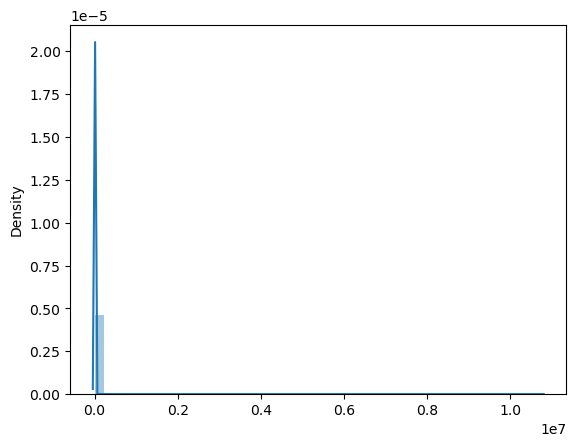

In [11]:
sns.distplot(df)

In [12]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,nb_extCSS,ratio_extRedirection,ratio_extErrors,login_form,external_favicon,links_in_tags,ratio_intMedia,ratio_extMedia,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status,scheme,netloc,path,url_length,num_path_segments,num_query_params,is_ip
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.00000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.293176,0.322660,0.006649,0.123097,4.289589,0.000700,1.027909,0.004024,0.062292,0.001925,0.034821,0.448469,0.127997,0.006562,0.016710,0.610936,0.053137,0.025024,0.000350,0.002362,0.065617,0.050131,0.021610,2.231671,0.202450,0.083290,0.123447,0.000175,0.498250,0.003150,6.232808,2.927472,3.127297,5.019773,2.398950,15.393876,10.467979,10.561505,7.258882,7.678075,5.092425,0.327734,0.104199,0.004112,0.004899,0.017935,0.059755,87.189764,0.602457,0.276720,0.784864,0.158926,0.062469,0.063605,0.442170,51.978211,42.870444,23.236293,0.001312,0.006037,37.063922,0.001137,0.00140,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739,0.500000,0.389064,4070.735521,2517.941295,61.120035,1.829746,0.253981,0.008399
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.998317,1.093336,0.081274,1.466450,1.882251,0.026448,0.240325,0.103240,0.598190,0.077111,0.375576,0.501912,0.379008,0.080742,0.169358,0.487559,0.089363,0.093422,0.018705,0.048547,0.247622,0.218225,0.145412,0.637069,0.401843,0.276332,0.328964,0.013227,0.691907,0.056035,5.572355,4.768936,2.211571,3.941580,2.997809,22.083644,4.932015,23.077883,4.145827,3.578435,7.147050,0.842600,0.305533,0.063996,0.069827,0.132722,0.331266,166.758254,0.376474,0.319958,2.758802,0.266437,0.156209,0.244058,0.496666,41.523144,46.249897,38.386577,0.036204,0.077465,39.073385,0.033707,0.03739,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955,0.500022,0.487559,2391.139552,2352.325972,55.292470,1.887386,0.885801,0.09126

In [13]:
x=df.drop('status', axis=1)
y=df['status']

In [14]:
# Checking VIF:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['features'] = dataset.columns
    vif['VIF_Values'] = [variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    vif['VIF_Values'] = round(vif['VIF_Values'], 2)
    vif = vif.sort_values(by = 'VIF_Values', ascending=False)
    return (vif)

In [15]:
vif=calculate_vif(df.drop('status',axis = 1))
vif

,features,VIF_Values
84,url_length,31656.67
0,length_url,31649.34
45,longest_word_path,116.92
43,longest_words_raw,107.13
38,length_words_raw,105.67
...,...,...
26,punycode,1.03
67,popup_window,1.02
66,iframe,1.01
70,right_clic,1.01


In [16]:
vif.value_counts()

features                 VIF_Values
abnormal_subdomain       2.17          1
avg_word_host            50.31         1
punycode                 1.03          1
prefix_suffix            1.42          1
port                     1.16          1
                                      ..
longest_word_path        116.92        1
longest_word_host        23.70         1
login_form               1.09          1
links_in_tags            3.15          1
whois_registered_domain  1.27          1
Name: count, Length: 88, dtype: int64

In [17]:
d_vif=vif[vif['VIF_Values'] > 10]

In [18]:
df.drop(d_vif['features'],axis=1,inplace=True)

<Axes: ylabel='Density'>

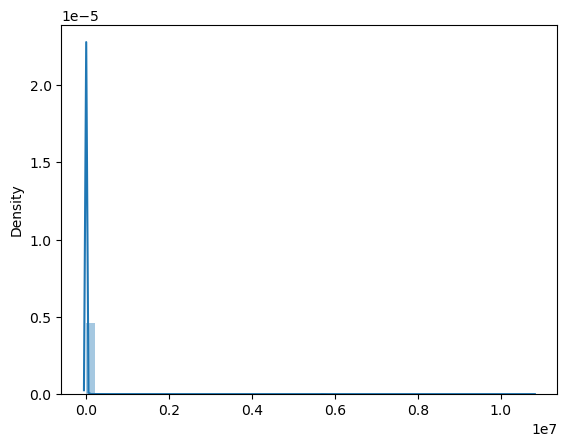

In [19]:
sns.distplot(df)

In [20]:
df.describe()

,length_hostname,ip,nb_at,nb_qm,nb_underscore,nb_tilde,nb_percent,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,char_repeat,shortest_words_raw,shortest_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,nb_extCSS,ratio_extRedirection,ratio_extErrors,login_form,external_favicon,links_in_tags,ratio_intMedia,ratio_extMedia,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status,netloc,path,is_ip
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.00000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000
mean,21.090289,0.150569,0.022222,0.141207,0.322660,0.006649,0.123097,0.000700,1.027909,0.004024,0.062292,0.001925,0.034821,0.448469,0.127997,0.006562,0.016710,0.053137,0.025024,0.000350,0.002362,0.065617,0.050131,0.021610,2.231671,0.202450,0.083290,0.123447,0.000175,0.498250,0.003150,2.927472,3.127297,2.398950,0.327734,0.104199,0.004112,0.004899,0.017935,0.059755,87.189764,0.602457,0.276720,0.784864,0.158926,0.062469,0.063605,0.442170,51.978211,42.870444,23.236293,0.001312,0.006037,37.063922,0.001137,0.00140,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739,0.500000,4070.735521,2517.941295,0.008399
std,10.777171,0.357644,0.155500,0.364456,1.093336,0.081274,1.466450,0.026448,0.240325,0.103240,0.598190,0.077111,0.375576,0.501912,0.379008,0.080742,0.169358,0.089363,0.093422,0.018705,0.048547,0.247622,0.218225,0.145412,0.637069,0.401843,0.276332,0.328964,0.013227,0.691907,0.056035,4.768936,2.211571,2.997809,0.842600,0.305533,0.063996,0.069827,0.132722,0.331266,166.758254,0.376474,0.319958,2.758802,0.266437,0.156209,0.244058,0.496666,41.523144,46.249897,38.386577,0.036204,0.077465,39.073385,0.033707,0.03739,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955,0.500022,2391.139552,2352.325972,0.091264
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [21]:
def logtrans(data):
  for col in data.columns:
    min_val = data[col].min()
    if min_val <= 0:
        # Add a constant slightly larger than the absolute minimum to avoid log(0)
        constant = 1 - min_val
        data[col] = np.log(data[col] + constant)
    else:
        # If all values are positive, can just apply log
        data[col] = np.log(data[col])
  return data

In [22]:
log_df=logtrans(df.drop('status',axis=1))

<Axes: ylabel='Density'>

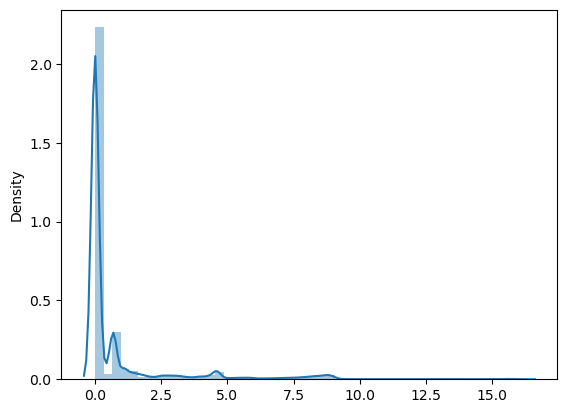

In [23]:
sns.distplot(log_df)

In [24]:
# Using PCA Concept:

# Step 1: Standardize the data
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
scaler = RobustScaler()
X_scaled = scaler.fit_transform(log_df)

# Step 2: Apply PCA

pca = PCA(n_components=0.95)
pca_data = pca.fit_transform(X_scaled)

# Step 4: Create DataFrame

pca_columns = [f'PC{j+1}' for j in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_data, columns=pca_columns)

# Step 5: Join Target Column with PCA:

pca_df = pca_df.join(df['status'], how = 'left')

pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,status
0,10.481163,-1.711826,0.853139,1.416296,0.495132,-0.550758,-0.055999,1.482217,-1.746288,0.960237,0.175347,0.887501,-0.015534,-0.092821,-0.758044,-0.282967,0.102392,-0.661547,-0.297831,0.040961,0
1,-1.624542,-0.744874,-0.774251,-0.567291,0.357220,0.187359,1.439135,-1.587590,0.920846,0.235028,-1.280140,-1.181546,0.814859,0.424553,-0.263081,-0.156038,-0.748466,0.200639,-0.474466,0.003206,1
2,-1.743082,-1.858249,-0.976293,-0.670608,2.156364,0.937624,0.338855,0.413500,0.954693,-1.027995,-0.776550,-0.176598,0.363658,-0.248550,0.364165,-0.373162,0.414018,0.866478,0.880353,-0.568761,1
3,5.115597,-0.556793,2.842402,1.318695,-0.128366,-1.008241,0.617359,-0.383604,-0.837316,-0.478392,0.776684,-0.051261,0.515251,-0.775557,0.790460,0.064254,-0.216243,0.420347,0.244093,-0.194641,0
4,-0.809813,1.636871,-0.170788,0.853081,-0.139654,-0.313707,0.518546,0.733834,0.235356,1.440824,-0.345070,0.643357,0.728992,0.290734,-0.261833,0.829858,0.124748,0.248767,-0.174169,-0.125212,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,3.249275,1.303213,-0.511216,0.690849,0.307903,-0.578603,-0.253313,-0.905269,0.414149,0.106873,-0.000450,0.764411,0.606020,0.372705,-0.357237,0.111925,-0.542441,0.574504,-0.138337,0.528635,0
11426,-1.649240,-0.103092,-0.411364,-0.535033,1.319136,-0.933044,-0.656899,-0.145932,0.326248,0.024295,-0.598217,0.898123,-0.789926,0.105027,0.864679,0.122090,-0.231274,0.330517,-0.143057,-0.108068,1
11427,-1.566401,0.804284,-3.236445,-0.034776,-1.694155,0.943063,-0.490856,-1.266497,-0.322642,0.508259,0.210827,-0.594619,-0.319779,-0.283715,0.121599,-1.441318,-0.300927,-0.345697,0.362409,-0.516789,0
11428,-0.067858,0.945506,0.216301,0.465120,0.177503,1.070597,-1.463239,0.430115,0.308826,0.202662,0.279912,-0.989390,0.457975,0.310603,-0.177166,-0.012488,-0.213429,0.762115,0.212160,0.347021,0


<Axes: ylabel='Density'>

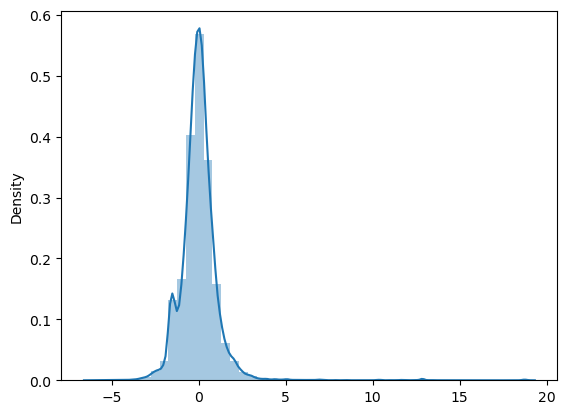

In [25]:
sns.distplot(pca_df.drop('status',axis=1))

In [26]:
# Model Building
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score,precision_score,recall_score,confusion_matrix
def train_and_test_split(data, tcol, testSize=0.3, randomState=3):
    X = data.drop(tcol,axis=1)
    y = data[tcol]
    return train_test_split(X,y,test_size = testSize,random_state=randomState)

def model_builder(model_name, model, data, t_col):
    X_train,X_test,y_train,y_test = train_and_test_split(data,t_col)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accu = accuracy_score(y_test, y_pred)
    F1 = f1_score(y_test,y_pred)
    pre= precision_score(y_test, y_pred)
    rec= recall_score(y_test, y_pred)
    result = [model_name, F1, accu,pre,rec]

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return result

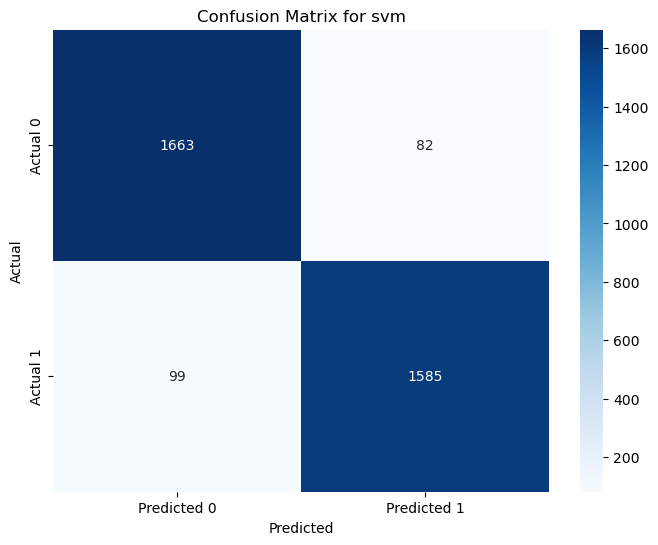

['svm',
 0.9459862727544017,
 0.9472149314669,
 0.9508098380323935,
 0.9412114014251781]

In [27]:
model_builder(model_name='svm',model=SVC(),data=pca_df,t_col='status')

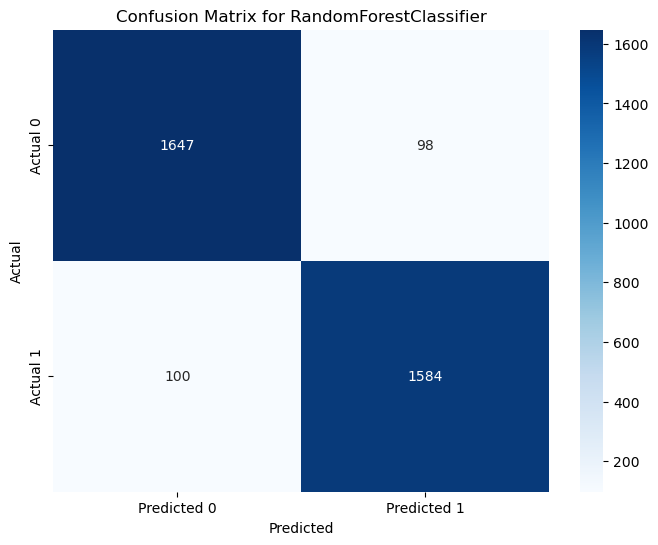

['RandomForestClassifier',
 0.9411764705882353,
 0.9422572178477691,
 0.9417360285374554,
 0.9406175771971497]

In [28]:
model_builder(model_name='RandomForestClassifier',model=RandomForestClassifier(),data=pca_df,t_col='status')

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

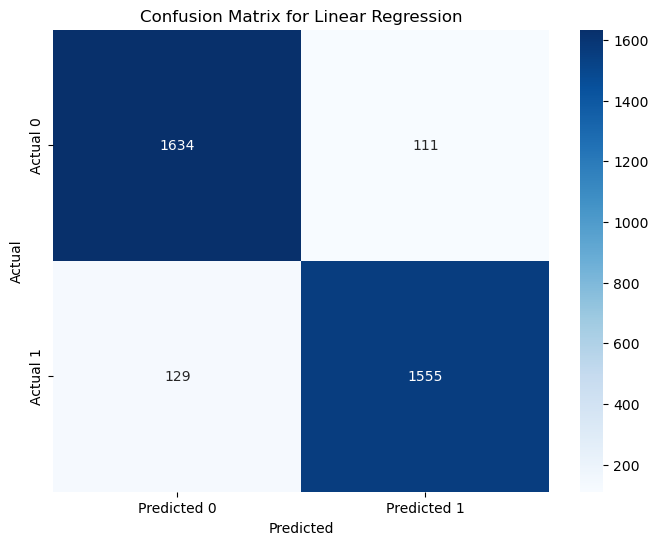

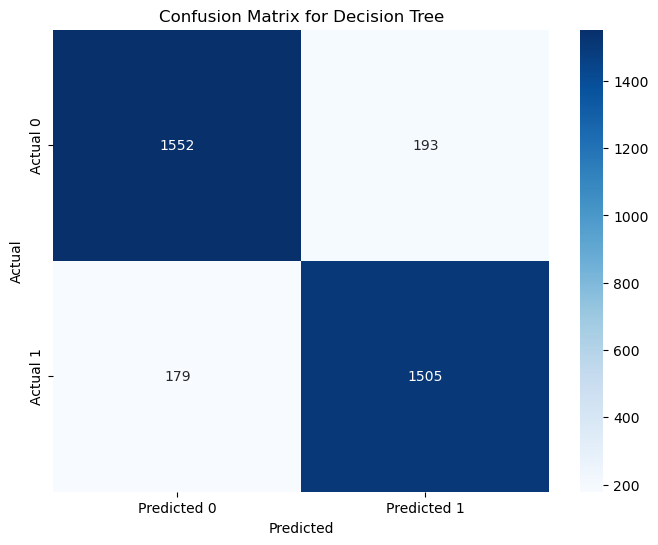

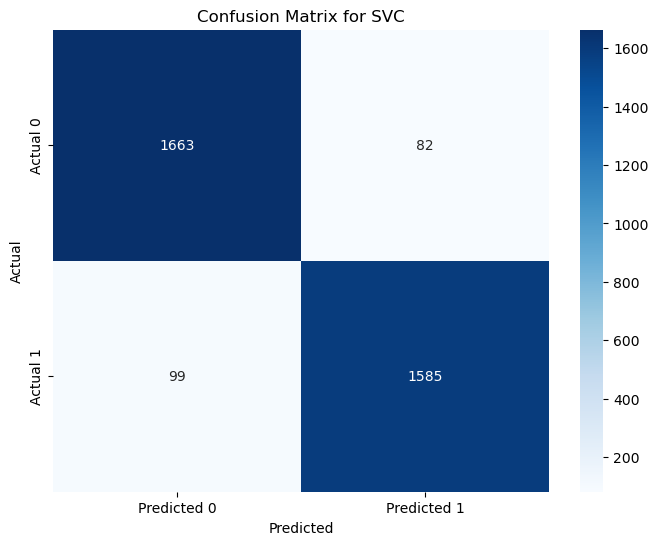

  File "c:\Users\yasha\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\yasha\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\yasha\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\yasha\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


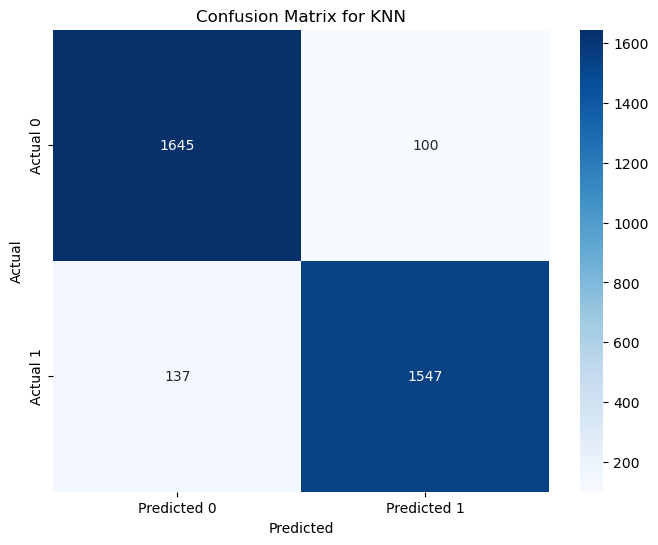

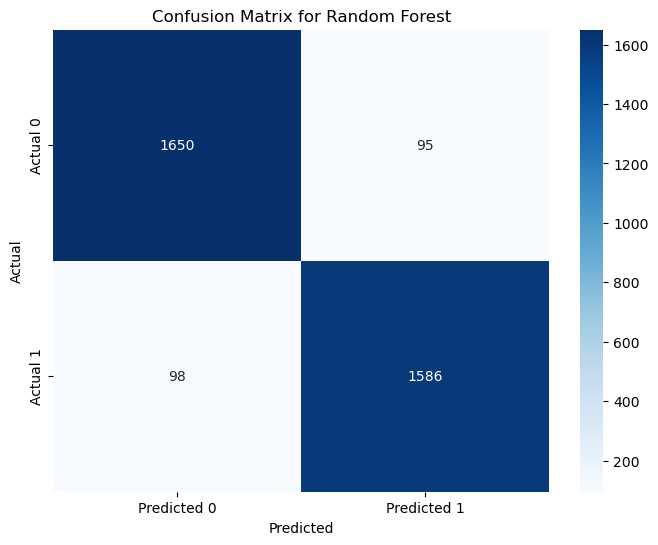

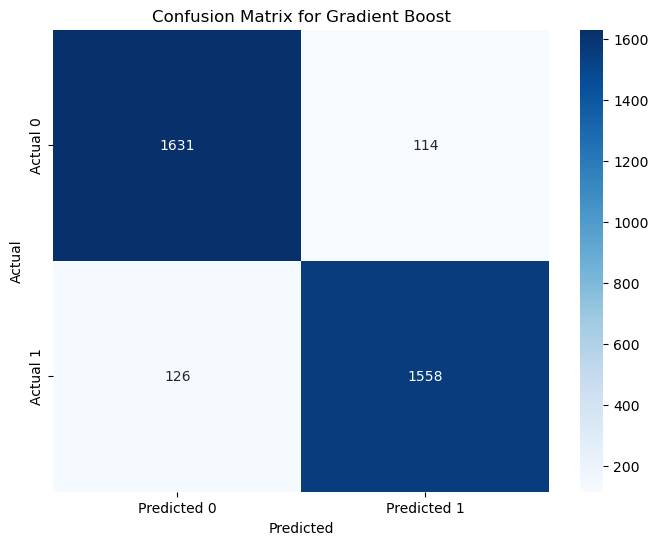

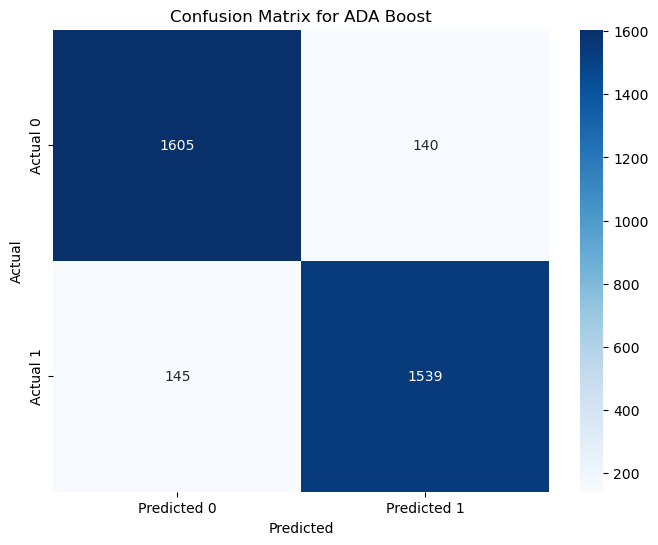

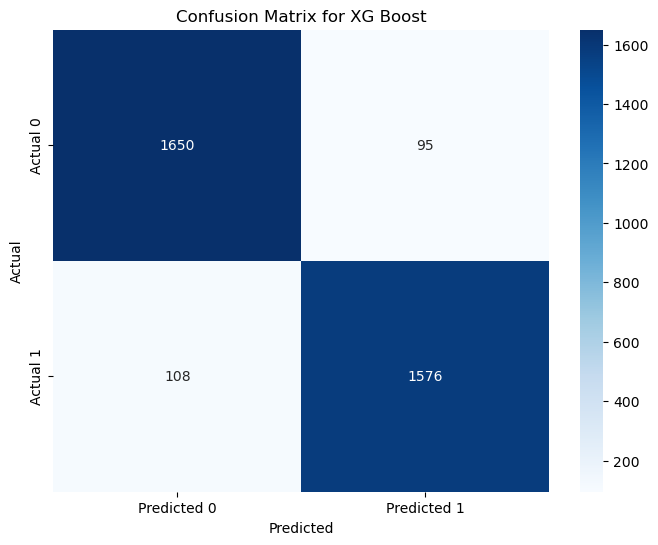

,Model Name,f1_score,accu,pre,rec
2,SVC,0.945986,0.947215,0.950810,0.941211
4,Random Forest,0.942645,0.943715,0.943486,0.941805
7,XG Boost,0.939493,0.940799,0.943148,0.935867
3,KNN,0.928850,0.930884,0.939284,0.918646
5,Gradient Boost,0.928486,0.930009,0.931818,0.925178
0,Linear Regression,0.928358,0.930009,0.933373,0.923397
6,ADA Boost,0.915254,0.916885,0.916617,0.913895
1,Decision Tree,0.890006,0.891514,0.886337,0.893705


In [30]:
def multiple_models(data, t_col):
    col_names=['Model Name','f1_score','accu','pre','rec']
    result = pd.DataFrame(columns = col_names)
    result.loc[len(result)] = model_builder('Linear Regression',LogisticRegression(),data,t_col)
    result.loc[len(result)] = model_builder('Decision Tree',DecisionTreeClassifier(),data,t_col)
    result.loc[len(result)] = model_builder('SVC',SVC(),data,t_col)
    result.loc[len(result)] = model_builder('KNN',KNeighborsClassifier(),data,t_col)
    result.loc[len(result)] = model_builder('Random Forest',RandomForestClassifier(),data,t_col)
    result.loc[len(result)] = model_builder('Gradient Boost',GradientBoostingClassifier(),data,t_col)
    result.loc[len(result)] = model_builder('ADA Boost',AdaBoostClassifier(),data,t_col)
    result.loc[len(result)] = model_builder('XG Boost',XGBClassifier(),data,t_col)
    return result.sort_values(by = "f1_score", ascending=False)

multiple_models(pca_df, "status")

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

def k_fold_cv_classification(X, y, fold=10):
    # Initialize classification models
    models = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        SVC(),
        KNeighborsClassifier(),
        RandomForestClassifier(),
        GradientBoostingClassifier(),
        AdaBoostClassifier(),
        XGBClassifier()
    ]

    model_names = [
        'Logistic Regression',
        'Decision Tree',
        'SVC',
        'KNN',
        'Random Forest',
        'Gradient Boost',
        'ADA Boost',
        'XG Boost'
    ]

    results = []

    # Perform cross-validation for each model
    for model, model_name in zip(models, model_names):
        f1_scores = cross_val_score(model, X, y, cv=fold, scoring='f1')  # Use 'f1' for F1 score

        # Store results
        results.append([model_name, np.mean(f1_scores), np.std(f1_scores)])

    # Create DataFrame and sort
    k_fold_df = pd.DataFrame(results, columns=['Model Name', 'CV F1-Score', 'CV F1-Score STD'])
    return k_fold_df.sort_values('CV F1-Score', ascending=False)  # Sort by F1 score

In [32]:
k_fold_cv_classification(pca_df.drop('status', axis=1), pca_df['status'])

,Model Name,CV F1-Score,CV F1-Score STD
7,XG Boost,0.951116,0.004198
2,SVC,0.949542,0.005390
4,Random Forest,0.945529,0.003099
3,KNN,0.933610,0.004368
5,Gradient Boost,0.932092,0.005216
0,Logistic Regression,0.924826,0.005577
6,ADA Boost,0.913422,0.007965
1,Decision Tree,0.890159,0.005323


In [34]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, randint

def tuning_classifier(X, y, fold=5, n_iter=5):
    # Define hyperparameter distributions
    param_dist = {
        'LogisticRegression': {
            'C': loguniform(1e-4, 1e4),
            'penalty': ['l1', 'l2']
        },
        'DecisionTreeClassifier': {
            'max_depth': randint(3, 20),
            'min_samples_split': randint(2, 20),
            'min_samples_leaf': randint(1, 20)
        },
        'SVC': {
            'C': loguniform(1e-4, 1e4),
            'gamma': loguniform(1e-4, 1e4),
            'kernel': ['linear', 'rbf', 'poly']
        },
        'KNeighborsClassifier': {
            'n_neighbors': randint(1, 20),
            'weights': ['uniform', 'distance']
        },
        'RandomForestClassifier': {
            'n_estimators': randint(50, 200),
            'max_depth': randint(3, 20),
            'min_samples_split': randint(2, 20),
            'min_samples_leaf': randint(1, 20)
        },
        'GradientBoostingClassifier': {
            'n_estimators': randint(50, 200),
            'learning_rate': loguniform(1e-4, 1e-1),
            'max_depth': randint(3, 10)
        },
        'AdaBoostClassifier': {
            'n_estimators': randint(50, 200),
            'learning_rate': loguniform(1e-4, 1e-1)
        },
        'XGBClassifier': {
            'n_estimators': randint(50, 200),
            'learning_rate': loguniform(1e-4, 1e-1),
            'max_depth': randint(3, 10),
            'subsample': [0.5, 0.75, 1.0]
        }
    }

    # Initialize classifiers and perform Random Search
    models = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        SVC(),
        KNeighborsClassifier(),
        RandomForestClassifier(),
        GradientBoostingClassifier(),
        AdaBoostClassifier(),
        XGBClassifier()
    ]

    model_names = [
        'LogisticRegression',
        'DecisionTreeClassifier',
        'SVC',
        'KNeighborsClassifier',
        'RandomForestClassifier',
        'GradientBoostingClassifier',
        'AdaBoostClassifier',
        'XGBClassifier'
    ]

    results = []

    for model, model_name in zip(models, model_names):
        # Get hyperparameter distribution for the current model
        current_param_dist = param_dist[model_name]

        # Create RandomizedSearchCV object
        random_search = RandomizedSearchCV(model, param_distributions=current_param_dist,
                                           n_iter=n_iter, cv=fold, scoring='f1',n_jobs=-1)

        # Fit the model
        random_search.fit(X, y)

        # Store results
        results.append([model_name, random_search.best_params_, random_search.best_score_])

    # Create DataFrame and sort by best score
    tuning_results_df = pd.DataFrame(results, columns=['Model Name', 'Best Parameters', 'Best F1-Score'])
    return tuning_results_df.sort_values('Best F1-Score', ascending=False)

tuning_results = tuning_classifier(pca_df.drop('status', axis=1), pca_df['status'])
print(tuning_results)

                   Model Name  \
7               XGBClassifier   
3        KNeighborsClassifier   
5  GradientBoostingClassifier   
4      RandomForestClassifier   
2                         SVC   
0          LogisticRegression   
1      DecisionTreeClassifier   
6          AdaBoostClassifier   

                                     Best Parameters  Best F1-Score  
7  {'learning_rate': 0.03984072823781666, 'max_de...       0.937428  
3          {'n_neighbors': 4, 'weights': 'distance'}       0.937273  
5  {'learning_rate': 0.033446526132189035, 'max_d...       0.932496  
4  {'max_depth': 12, 'min_samples_leaf': 15, 'min...       0.931151  
2  {'C': 0.28119775413191733, 'gamma': 0.16918460...       0.924540  
0          {'C': 21.64411540103675, 'penalty': 'l2'}       0.923706  
1  {'max_depth': 9, 'min_samples_leaf': 12, 'min_...       0.894318  
6  {'learning_rate': 0.09240966064015728, 'n_esti...       0.881348  


In [35]:
tuning_results

,Model Name,Best Parameters,Best F1-Score
7,XGBClassifier,"{'learning_rate': 0.03984072823781666, 'max_de...",0.937428
3,KNeighborsClassifier,"{'n_neighbors': 4, 'weights': 'distance'}",0.937273
5,GradientBoostingClassifier,"{'learning_rate': 0.033446526132189035, 'max_d...",0.932496
4,RandomForestClassifier,"{'max_depth': 12, 'min_samples_leaf': 15, 'min...",0.931151
2,SVC,"{'C': 0.28119775413191733, 'gamma': 0.16918460...",0.924540
0,LogisticRegression,"{'C': 21.64411540103675, 'penalty': 'l2'}",0.923706
1,DecisionTreeClassifier,"{'max_depth': 9, 'min_samples_leaf': 12, 'min_...",0.894318
6,AdaBoostClassifier,"{'learning_rate': 0.09240966064015728, 'n_esti...",0.881348


In [36]:
import pickle
from scipy.stats import randint, loguniform
from sklearn.model_selection import RandomizedSearchCV

# Assuming 'tuning_results' DataFrame from the previous code execution is available

# Find the best model based on 'Best F1-Score'
best_model_name = tuning_results.loc[tuning_results['Best F1-Score'].idxmax(), 'Model Name']
best_model_params = tuning_results.loc[tuning_results['Best F1-Score'].idxmax(), 'Best Parameters']

print(f"Best Model: {best_model_name}")
print(f"Best Parameters: {best_model_params}")

#Re-initialize the best model with the best parameters
if best_model_name == 'LogisticRegression':
    from sklearn.linear_model import LogisticRegression
    best_model = LogisticRegression(**best_model_params)
elif best_model_name == 'DecisionTreeClassifier':
    from sklearn.tree import DecisionTreeClassifier
    best_model = DecisionTreeClassifier(**best_model_params)
elif best_model_name == 'SVC':
    from sklearn.svm import SVC
    best_model = SVC(**best_model_params)
elif best_model_name == 'KNeighborsClassifier':
    from sklearn.neighbors import KNeighborsClassifier
    best_model = KNeighborsClassifier(**best_model_params)
elif best_model_name == 'RandomForestClassifier':
    from sklearn.ensemble import RandomForestClassifier
    best_model = RandomForestClassifier(**best_model_params)
elif best_model_name == 'GradientBoostingClassifier':
    from sklearn.ensemble import GradientBoostingClassifier
    best_model = GradientBoostingClassifier(**best_model_params)
elif best_model_name == 'AdaBoostClassifier':
    from sklearn.ensemble import AdaBoostClassifier
    best_model = AdaBoostClassifier(**best_model_params)
elif best_model_name == 'XGBClassifier':
    from xgboost import XGBClassifier
    best_model = XGBClassifier(**best_model_params)
else:
    raise ValueError("Invalid best model name")

# Train the best model (replace X and y with actual data)
X = pca_df.drop('status',axis=1)
y = pca_df['status']
best_model.fit(X,y)

# Save the best model to a pickle file in your Google Drive
filename = 'best_model.pkl'  # Replace with desired path
pickle.dump(best_model, open(filename, 'wb'))

print(f"Best model saved to: {filename}")


Best Model: XGBClassifier
Best Parameters: {'learning_rate': 0.03984072823781666, 'max_depth': 9, 'n_estimators': 56, 'subsample': 0.5}
Best model saved to: best_model.pkl


In [38]:

encoders = {
        'scheme': le_scheme,
        'netloc': le_netloc,
        'path': le_path
        # Add others if you encoded more columns used as features
    }
encoder_filename = 'label_encoders.pkl'
with open(encoder_filename, 'wb') as f:
    pickle.dump(encoders, f)
print(f"Successfully saved label encoders to: {encoder_filename}")




target_column = 'status'
if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found in df. Adjust logic to get feature list.")

features_kept_after_vif = df.drop(target_column, axis=1).columns.tolist()
features_kept_filename = 'features_kept.pkl'
with open(features_kept_filename, 'wb') as f:
    pickle.dump(features_kept_after_vif, f)
print(f"Successfully saved list of kept features ({len(features_kept_after_vif)} columns) to: {features_kept_filename}")




scaler_filename = 'robust_scaler.pkl'
with open(scaler_filename, 'wb') as f:
    pickle.dump(scaler, f)
print(f"Successfully saved scaler to: {scaler_filename}")



pca_filename = 'pca_transformer.pkl'
with open(pca_filename, 'wb') as f:
    pickle.dump(pca, f)
print(f"Successfully saved PCA transformer to: {pca_filename}")


Successfully saved label encoders to: label_encoders.pkl
Successfully saved list of kept features (69 columns) to: features_kept.pkl
Successfully saved scaler to: robust_scaler.pkl
Successfully saved PCA transformer to: pca_transformer.pkl
